In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


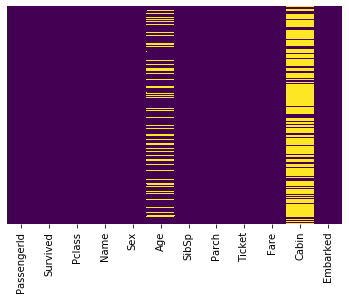

In [6]:
# as we've the data so i might happen that we have some missing values so for this
# we use seaborn heatmap to see which values are missing
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# every yello dash mean that their is a null value like we're missing age and cabin 
# so i can use the other col to fill the age data 
# but for cabin its hard as we cant relate it with other cols

In [7]:
sns.set_style('whitegrid')

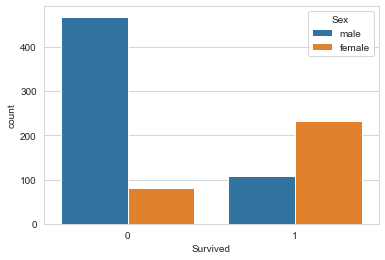

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train)
# 550 not survived and 350 survived
# hue se mazeed categorised krduya
# ppl that didn't survived are much likely to be male
# and ppl that survived are more female

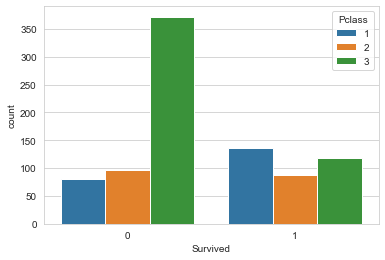

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)
# same here ppl who didnt survive where from class 3 the lower one


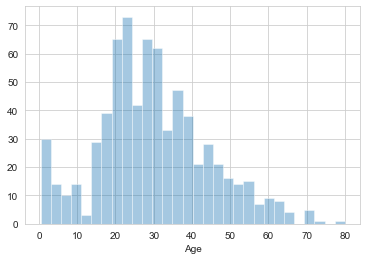

In [10]:
# let see about age we'll use dist plot for that
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

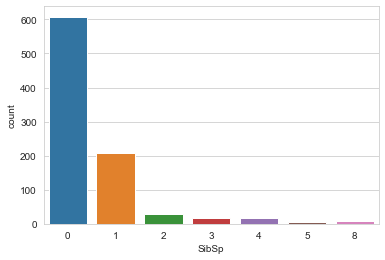

In [11]:
sns.countplot(x='SibSp',data=train)
# sibsp col repr if the passenger had any children or spouse with him
# so we can see that mostly passengers were without them

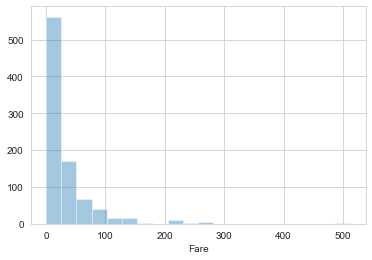

In [12]:
sns.distplot(train['Fare'],kde=False,bins=20)
# so we can see on the axis mostly prices are b/w 0 and 50 and we've
# also obs above that mostly people were travelling in the cheaper class

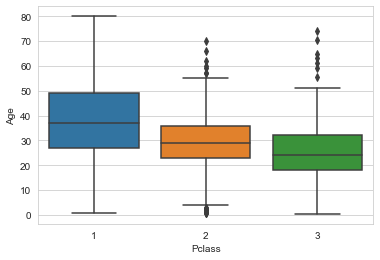

In [13]:
# now we'll fix some of the missinfg data issue
# like above heatmap shows we've some missing values in the age col so we'll solve it using IMPUTATION
# means we'll be going tot ake the mean of the AGE column
sns.boxplot(x='Pclass',y='Age',data=train)
# we can see when we seperate by class then in class 1 n 2 the passengers are older as compared to 3rd class
# so we can use these age to do imputation for missing values by class

In [14]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
# writing the age values by observing the box plot    
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# axis = 1 means i'm applying it to col
# ['Age','Pclass'] impute_age ke arg ma jaegi kio ma uspe apply fucntion laga rha tu
# ye usku as an arg consider krega

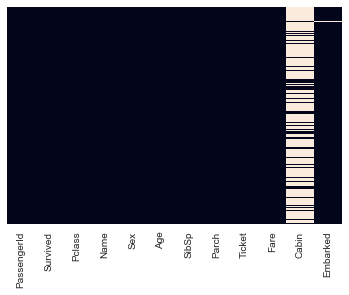

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
# now we've no missing info for age value 
# now we've to fix cabin values but there are alot missing info so we'll just drop this col

In [17]:
train.drop('Cabin',axis=1,inplace=True)
# ab 1 row b ha jisme null value ha tu wu 1 row ha usku drop krdu
# masla ni ha


In [18]:
train.dropna(inplace=True)

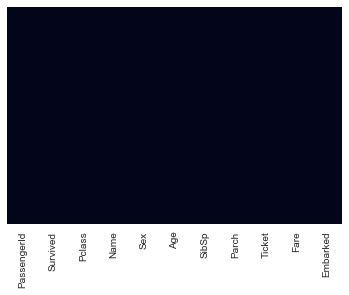

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
# now we've no missing values

In [20]:
# now we'll convert the categorical features into dummy variable using pandas else our model wont take thos features as input
# like in sex col we've male and female and our model isn't capable to take such strings
# so we'll create dummy variable also we've to do same for EMBARKED columns as it contains the cities fist letter only

sex = pd.get_dummies(train['Sex'],drop_first=True)
# multi collinearity - ke model smjhe agar female ma 0 ha tu male ma obv 1 huge means 1 col is
# predictor of other col if i feed both col to the model
# the this multi colinearity occurs it just mess up the algo as one col is predictor of bunch of others so we'll drop the first col

In [21]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# same we'll do with embarked
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
embark.head()
# we dropped the C column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [26]:
# dropping useless cols
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1


In [28]:
# now all data is numerical and we can work it now easily into a ML model
train.drop(['PassengerId'],axis=1,inplace=True)
# jab indexing ha pd ki tu wu use krenge ye data b uraa masla ni
# ab yhan Pclass col b categorical ha tu hame isku b tu dummy krna huga tu dekhtey hn kia scene huga

In [33]:
X= train.drop('Survived',axis=1)
y= train['Survived']
# y pe wu col jisku predict kr rhe hn

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
# now train and predict
from sklearn.linear_model import LogisticRegression

In [61]:
Logr = LogisticRegression(solver='liblinear')

In [62]:
Logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
pred = Logr.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       174
           1       0.84      0.65      0.73       120

    accuracy                           0.81       294
   macro avg       0.81      0.78      0.79       294
weighted avg       0.81      0.81      0.80       294



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,pred)

array([[159,  15],
       [ 42,  78]], dtype=int64)